# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Ames Housing Data again!

We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ames = pd.read_csv('ames.csv')

# using 9 predictive categorical or continuous features, plus the target SalePrice
continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

In [2]:
X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']

### Perform a train-test split

In [3]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

In [4]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

1095 365 1095 365


### Apply your model to the train set

In [5]:
# Import and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [6]:
# Fit the model to train data
linreg.fit(X_train, y_train)

LinearRegression()

### Calculate predictions on training and test sets

In [7]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### Calculate training and test residuals

In [8]:
# Calculate residuals
residuals_train = y_train - y_hat_train
residuals_test = y_test - y_hat_test

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [9]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [10]:
# Calculate training and test MSE
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')

Training MSE: 0.15534182625573134
Testing MSE: 0.19822868168443533


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [11]:
# Your code here
test_sizes = np.arange(5,100,5)/100

# initialize output dictionary
output = {'test_sizes': test_sizes, 'train_errors': [], 'test_errors': []}

# iterate through test_sizes
for test_size in test_sizes:
    # split dataset into training & testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # fit model to training set
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    # make predictions for both training & testing sets
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    
    # calculate MSE
    mse_train = mean_squared_error(y_train, y_hat_train)
    mse_test = mean_squared_error(y_test, y_hat_test)
    
    output['train_errors'].append(mse_train)
    output['test_errors'].append(mse_test)
    
errors_df = pd.DataFrame.from_dict(output)

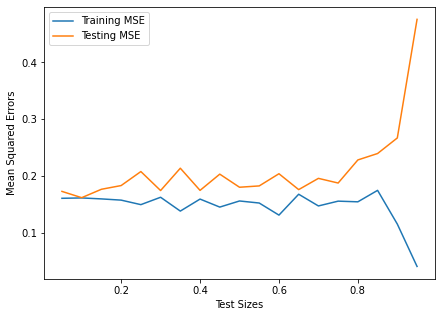

In [12]:
# Plot training & testing MSE
fig, ax = plt.subplots(figsize=(7,5))

sns.lineplot(errors_df.test_sizes, errors_df.train_errors, ax=ax, label="Training MSE")
sns.lineplot(errors_df.test_sizes, errors_df.test_errors, ax=ax, label="Testing MSE")
ax.legend()

ax.set(xlabel='Test Sizes',
        ylabel='Mean Squared Errors')

fig.show();

As test size increases from 0.5 to 0.95, MSE for testing set also increases, while MSE for training set seems to decreases

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

In [13]:
# Your code here
test_sizes = np.arange(5,100,5)/100
iterations = 10

# initialize output dictionary
output2 = {'test_sizes': test_sizes, 'train_errors': [], 'test_errors': []}

# iterate through test_sizes
for test_size in test_sizes:
    train_lst = []
    test_lst = []
    for _ in range(iterations):
        # split dataset into training & testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        # fit model to training set
        linreg = LinearRegression()
        linreg.fit(X_train, y_train)

        # make predictions for both training & testing sets
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)

        # calculate & store MSE
        train_lst.append(mean_squared_error(y_train, y_hat_train))
        test_lst.append(mean_squared_error(y_test, y_hat_test))
        
    output2['train_errors'].append(np.mean(train_lst))
    output2['test_errors'].append(np.mean(test_lst))
    
errors_df2 = pd.DataFrame.from_dict(output2)

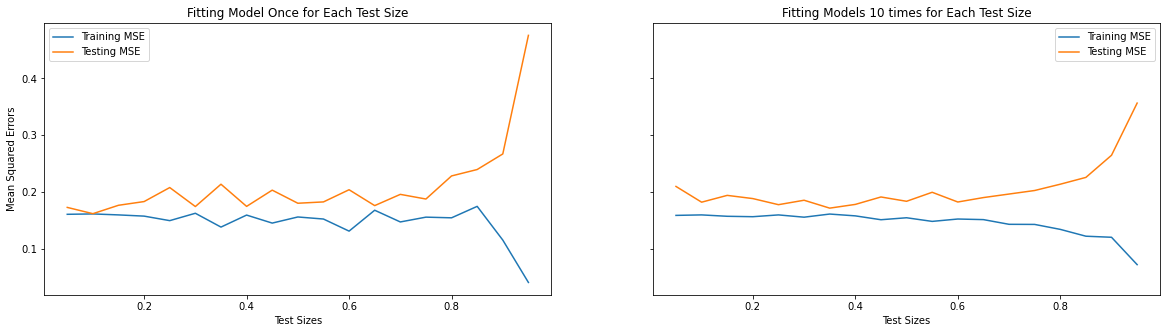

In [14]:
# Plot training & testing MSE
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)

sns.lineplot(errors_df.test_sizes, errors_df.train_errors, ax=ax1, label="Training MSE")
sns.lineplot(errors_df.test_sizes, errors_df.test_errors, ax=ax1, label="Testing MSE")
ax1.legend()

ax1.set(xlabel='Test Sizes',
        ylabel='Mean Squared Errors',
        title='Fitting Model Once for Each Test Size')

sns.lineplot(test_sizes, errors_df2.train_errors, ax=ax2, label="Training MSE")
sns.lineplot(test_sizes, errors_df2.test_errors, ax=ax2, label="Testing MSE")
ax2.legend()

ax2.set(xlabel='Test Sizes',
        ylabel='Mean Squared Errors',
        title=f'Fitting Models {iterations} times for Each Test Size')

fig.show();

What's happening here? Evaluate your result!

Getting the mean MSE of 10 models for each test_size seems to smooth out the curves for MSE.

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.